# Chapter 43: Searching in and Among Scores

In [2]:
from music21 import *

In [3]:
lamb1 = corpus.parse('palestrina/agnus_I_01', forceSource=True)

In [4]:
lamb1.measures(0, 7).show('xml')

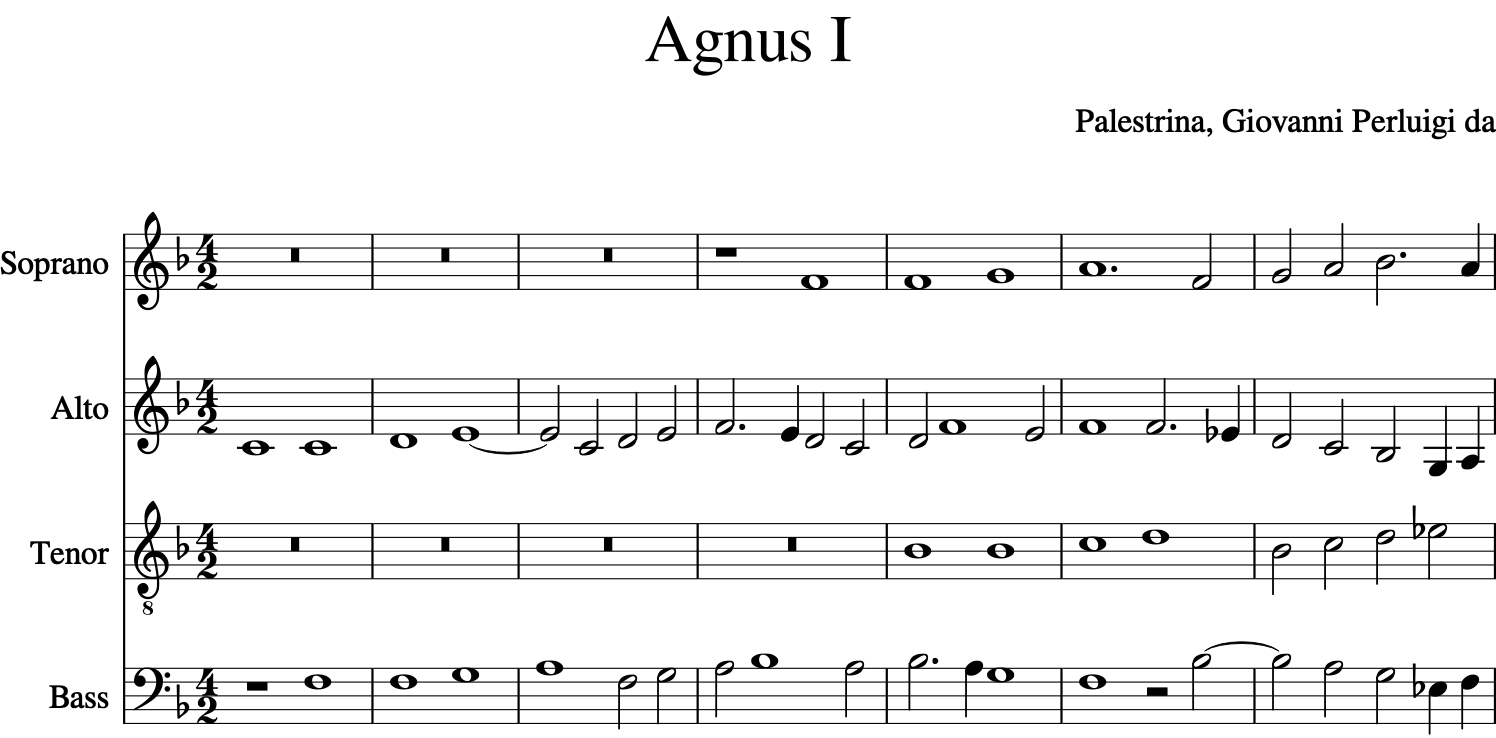

Let’s find all instances of three whole notes in a row…

In [5]:
justTheNotes = lamb1.recurse().notes
searchList = [note.Note(type='whole'), note.Note(type='whole'), note.Note(type='whole')]

search.rhythmicSearch(justTheNotes,
                      searchList)

[0, 107, 108, 189, 216, 217, 243, 251, 302, 303, 324]

In [6]:
secondEntry = justTheNotes[107]
secondEntry

<music21.note.Note C>

In [7]:
secondEntry.getContextByClass('Part')

<music21.stream.Part spine_2>

In [8]:
secondEntry.measureNumber

1

In [9]:
secondEntry.beat

1.0

In [10]:
lamb2 = lamb1.stripTies()

In [11]:
justTheNotes = lamb2.recurse().notes
search.rhythmicSearch(justTheNotes,
                      searchList)

[0, 102, 207, 208, 232, 240, 241, 287, 288, 298]

In [12]:
thirdEntry = justTheNotes[207]

In [13]:
p = thirdEntry.getContextByClass('Part')

In [14]:
p.recurse().getElementsByClass('Instrument')[0]

<music21.instrument.Tenor 'Tenor'>

In [15]:
entryPoints = search.rhythmicSearch(justTheNotes, searchList)

In [16]:
for notePosition in entryPoints:
    startingNote = justTheNotes[notePosition]
    startingMeasure = startingNote.measureNumber
    startingBeat = startingNote.beat
    startingPart = startingNote.getContextByClass('Part')
    startingInstrument = startingPart.recurse().getElementsByClass('Instrument')[0]
    print(startingNote, startingMeasure, startingBeat, startingInstrument)

<music21.note.Note F> 4 3.0 Soprano
<music21.note.Note C> 1 1.0 Alto
<music21.note.Note B-> 5 1.0 Tenor
<music21.note.Note B-> 5 3.0 Tenor
<music21.note.Note G> 12 3.0 Tenor
<music21.note.Note B-> 18 1.0 Tenor
<music21.note.Note C> 18 3.0 Tenor
<music21.note.Note F> 1 3.0 Bass
<music21.note.Note F> 2 1.0 Bass
<music21.note.Note G> 5 3.0 Bass


## Advanced Topics: Writing your own algorithm

Let’s say that you want to compare notes by pitchClass and not by name, write your own.

In [21]:
# The algorithm should check to see if two notes have the same pitchClass
def pitchClassEqual(n1, n2):
    if n1.pitch.pitchClass == n2.pitch.pitchClass:
        return True
    else:
        return False

Now we can run a search on something with this algorithm:

In [22]:
s = converter.parse('tinyNotation: 5/4 b4 c d# e f b# e- f-').recurse().notes
searchList = [note.Note('c'), note.Note('E-'), note.Note('E')]

# s表示要搜索的音乐流，searchList表示要查找的对象列表，algorithm表示用于比较两个对象的函数
search.streamSearchBase(s, searchList, algorithm=pitchClassEqual)

[1, 5]

Why the reslut is [1,5], I'm still confusing!!!

In [25]:
s1 = converter.parse('tinyNotation: 5/4 b4 c d# e f b# e- f-')
s1.show('xml')

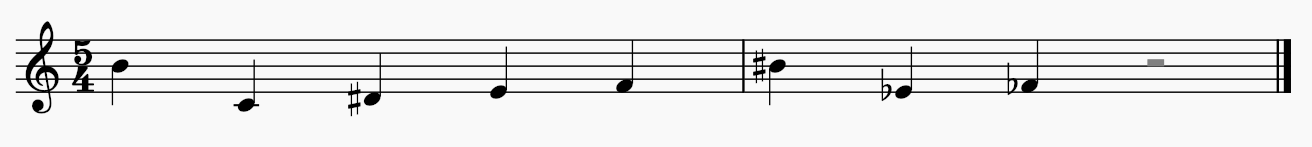